## pCMV-Target-AIDmax
QUEEN script for pCMV-Target-AIDmax construction
1. A nCas9-encoding fragment was amplified from pCMV-BE4max using the primer pair SI1308/SI1305.
2. A fragment encoding the human codon-optimized PmCDA1-UGI was amplified from the pUC-optimized-PmCDA1-ugi plasmid using the primer pair SI1304/SI1307.
3. A backbone fragment was amplified from pCMV-ABEmax using the primer pair SI1310/SI1309.
4. The three fragments were assembled by Gibson Assembly.

In [1]:
%matplotlib inline

In [2]:
import sys 
sys.path.append("/Users/hideto/dropbox/HIDETO_MORI.LAB/Experiments/Project/Dbrick/github")
from QUEEN.queen import *
set_namespace(globals()) 
if "output" not in os.listdir("./"):
    os.mkdir("output")

<Figure size 72x72 with 0 Axes>

In [3]:
QUEEN(record="https://benchling.com/s/seq-TWeI3GfYr2zJr5z87Rjq", dbtype="benchling", product="pCMV_BE4max")  #Load pCMV-BE4max plasmid object.
QUEEN(record="https://benchling.com/s/seq-OCkN5m6U6st0I9ToyOn1", dbtype="benchling", product="pCMV_ABEmax")  #Load pCMV-ABEmnax plasmid object.
QUEEN(record="https://benchling.com/s/seq-APwTvCrCHnd38ugWloNK", dbtype="benchling", product="opt_CDA1_ugi") #Load opt_CDA1_ugi plasmid object.

<queen.QUEEN object; project='opt_CDA1_ugi', length='3874 bp', topology='circular'>

In [4]:
processname1 = "PCR"
description1 = "1. A nCas9-encoding fragment was amplified from pCMV-BE4max using the primer pair SI1308/SI1305."
QUEEN(seq="ACCAAAGAAGAAGCGGAAAGTCGACAAGAAGTACAGCATCGGCCT", product="SI1308") #Create a QUEEN object for the forward primer.
QUEEN(seq="GTCACCTCCCAGCTGAGACAGGTCG", product="SI1305")                     #Create a QUEEN object for the reverse primer.
pCMV_BE4max.searchsequence(SI1308.seq[-18:], product="FW6", pn=processname1, pd=description1)         #Search for the 18-bp 3’-end sequences of the forward primer.
pCMV_BE4max.searchsequence(SI1305.seq[-18:], product="RV6", pn=processname1, pd=description1)         #Search for the 18-bp 3’-end sequences of the reverse primer.
cropdna(pCMV_BE4max, FW6[0].end, RV6[0].start,  product="extract6", pn=processname1, pd=description1) #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract6, SI1308.seq, SI1305.rcseq, product="fragment6", pn=processname1, pd=description1) #Add forward and reverse primer sequences to the both ends of the cropped fragment. 

<queen.QUEEN object; project='fragment6', length='4123 bp', topology='linear'>

In [5]:
processname2 = "PCR"
description2 = "2. A fragment encoding the human codon-optimized PmCDA1-UGI was amplified from the pUC-optimized-PmCDA1-ugi plasmid using the primer pair SI1304/SI1307."
QUEEN(seq="CCTGTCTCAGCTGGGAGGTGACGGCGGAGGAGGAACTGGAGGAGG", product="SI1304") #Create a QUEEN object for the forward primer.
QUEEN(seq="TCAGCGGGTTTAAACTCATTATCACAGCATTTTGATTTTGTTCTC", product="SI1307") #Create a QUEEN object for the reverse primer.
opt_CDA1_ugi.searchsequence(SI1304.seq[-18:], product="FW7", pn=processname2, pd=description2)        #Search for the 18-bp 3’-end sequences of the forward primer.
opt_CDA1_ugi.searchsequence(SI1307.seq[-18:], product="RV7", pn=processname2, pd=description2)        #Search for the 18-bp 3’-end sequences of the reverse primer.
cropdna(opt_CDA1_ugi, FW7[0].end, RV7[0].start, product="extract7", pn=processname2, pd=description2) #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract7, SI1304.seq, SI1307.rcseq, product="fragment7", pn=processname2, pd=description2) #Add forward and reverse primer sequences to the both ends of the cropped fragment.

<queen.QUEEN object; project='fragment7', length='1231 bp', topology='linear'>

In [6]:
processname3 = "PCR"
description3 = "3. A backbone fragment was amplified from pCMV-ABEmax using the primer pair SI1310/SI1309."
QUEEN(seq="TGATAATGAGTTTAAACCCGCTGA", product="SI1310")     #Create a QUEEN object for the forward primer.
QUEEN(seq="GACTTTCCGCTTCTTCTTTGGTGACTCG", product="SI1309") #Create a QUEEN object for the reverse primer.
pCMV_ABEmax.searchsequence(SI1310.seq[-18:], product="FW8", pn=processname3, pd=description3)         #Search for the 18-bp 3’-end sequences of the forward primer.
pCMV_ABEmax.searchsequence(SI1309.seq[-18:], product="RV8", pn=processname3, pd=description3)         #Search for the 18-bp 3’-end sequences of the reverse primer.
cropdna(pCMV_ABEmax, FW8[0].end, RV8[0].start,  product="extract8", pn=processname3, pd=description3) #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract8, SI1310.seq, SI1309.rcseq, product="fragment8", pn=processname3, pd=description3) #Add forward and reverse primer sequences to the both ends of the cropped fragment.

<queen.QUEEN object; project='fragment8', length='3439 bp', topology='linear'>

In [7]:
processname4 = "Gibson Assembly"
description4 = "4. The three fragments were assembled by Gibson Assembly."
modifyends(fragment6, "*{22}/-{22}", "-{22}/*{22}", product="fragment6_mod", pn=processname4, pd=description4)                            #Generate long sticky ends on the both sides of "fragment6".
modifyends(fragment7, "*{22}/-{22}", "-{24}/*{24}", product="fragment7_mod", pn=processname4, pd=description4)                            #Generate long sticky ends on the both sides of "fragment7". 
modifyends(fragment8, "*{24}/-{24}", "-{22}/*{22}", product="fragment8_mod", pn=processname4, pd=description4)                            #Generate long sticky ends on the both sides of "fragment8".
joindna(fragment6_mod, fragment7_mod, fragment8_mod, topology="circular", product="pCMV_Target_AIDmax", pn=processname4, pd=description4) #Join the fragments.

<queen.QUEEN object; project='pCMV_Target_AIDmax', length='8725 bp', topology='circular'>

In [8]:
pCMV_Target_AIDmax.printfeature()

feature_id  feature_type  qualifier:label         start  end   strand  
0           source        source                  0      4053  +       
100         misc_feature  GS_2x GS linker         4078   4108  +       
200         misc_feature  GenScript J9270EH080-1  4078   5266  +       
300         source        source                  4101   5242  +       
400         misc_feature  GS_Mutated SH3 domain   4108   4279  +       
500         misc_feature  SG_3x FLAG              4279   4357  +       
600         CDS           GS_PmCDA1               4357   4984  +       
700         CDS           SV40 NLS                4984   5005  +       
800         CDS           GS_UGI                  5011   5263  +       
900         source        source                  5287   8237  +       
1000        primer_bind   BGH-rev                 5291   5309  -       
1100        polyA_signal  bGH poly(A) signal      5297   5522  +       
1200        primer_bind   M13 Reverse             5592   5609  -

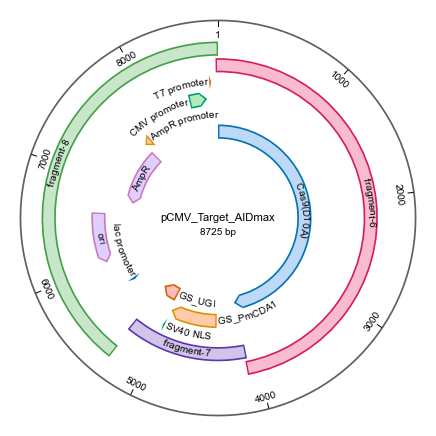

In [9]:
def add_fragment_annotation(dna, fragment, new_feature_id, color_set):
    """
    Define seqeunce featurtes for "fragment" in "dna". 
    """
    f = dna.searchsequence(fragment.seq) #Search for "fragment" seqeunce in "dna"
    editfeature(dna, source=f, target_attribute="feature_id", operation=createattribute(new_feature_id), new_copy=False)                                                      #Define a new feature whose feature_id becomes "new_feature_id".
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="qualifier:label", operation=createattribute(new_feature_id), new_copy=False)         #Provide a qualifier:label to the new feature.
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="qualifier:edgecolor_queen", operation=createattribute(color_set[0]), new_copy=False) #Set a edge color for the new feature.
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="qualifier:facecolor_queen", operation=createattribute(color_set[1]), new_copy=False) #Set a face color for the new feature.
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="strand", operation=replaceattribute(0), new_copy=False)                              #Set a coding direction of the new feature
    
def visualization(dna):
    """
    Set the start position of "dna" and visualize its circular sequence map. 
    """
    dna.searchfeature(key_attribute="qualifier:label", query="^Cas9", product="Cas9")           #Search for the feature that represent the Cas9 gene.
    plasmid   = joindna(cutdna(dna, Cas9[0].start)[0], topology="circular")                     #Set the first nucleotide of the Cas9 gene as the start position of the plasmid.
    fragments = plasmid.searchfeature(key_attribute="qualifier:label", query="fragment-[0-9]+") #Obtain the features whose feature_id are "fragment-[0-9]+".
    fragments.sort(key=lambda x:x.qualifiers["label"][0])                                       #Sort the order of fragments according to qualifier.label.
    features  = plasmid.searchfeature(key_attribute="feature_type", query="CDS") + plasmid.searchfeature(key_attribute="feature_type", query="promoter") + plasmid.searchfeature(key_attribute="feature_type", query="rep_origin") + fragments #Select the sequence features to be visualized.
    fig        = visualizemap(plasmid, feature_list=features, map_view="circular", tick_interval=1000, title=dna.project) #Visualize the circular seqeunce map of the plasmid.
    return fig, plasmid


#Paris of color codes for gene edge and face 
color_sets = [('#E53935', '#ffcdd2'), ('#8E24AA', '#e1bee7'), ('#3949AB', '#c5cae9'), ('#1E88E5', '#bbdefb'), ('#00ACC1', '#b2ebf2'), ('#D81B60', '#f8bbd0'), ('#5E35B1', '#d1c4e9'), 
              ('#43A047', '#c8e6c9'), ('#7CB342', '#dcedc8'), ('#FDD835', '#fff9c4'), ('#FB8C00', '#ffe0b2'), ('#6D4C41', '#d7ccc8'), ('#C0CA33', '#f0f4c3'), ('#546E7A', '#cfd8dc')]


add_fragment_annotation(pCMV_Target_AIDmax, fragment6, "fragment-6", color_sets[5]) #Add "fragment-6" to .dnafeatures of "pCMV_Target_AIDmax" plasmid object. 
add_fragment_annotation(pCMV_Target_AIDmax, fragment7, "fragment-7", color_sets[6]) #Add "fragment-7" to .dnafeatures of "pCMV_Target_AIDmax" plasmid object. 
add_fragment_annotation(pCMV_Target_AIDmax, fragment8, "fragment-8", color_sets[7]) #Add "fragment-8" to .dnafeatures of "pCMV_Target_AIDmax" plasmid object. 
fig, plasmid = visualization(pCMV_Target_AIDmax)                                    #Visualize the circular sequence map of pCMV-Target-AIDmax.
fig.savefig("output/pCMV_Target_AIDmax.pdf")

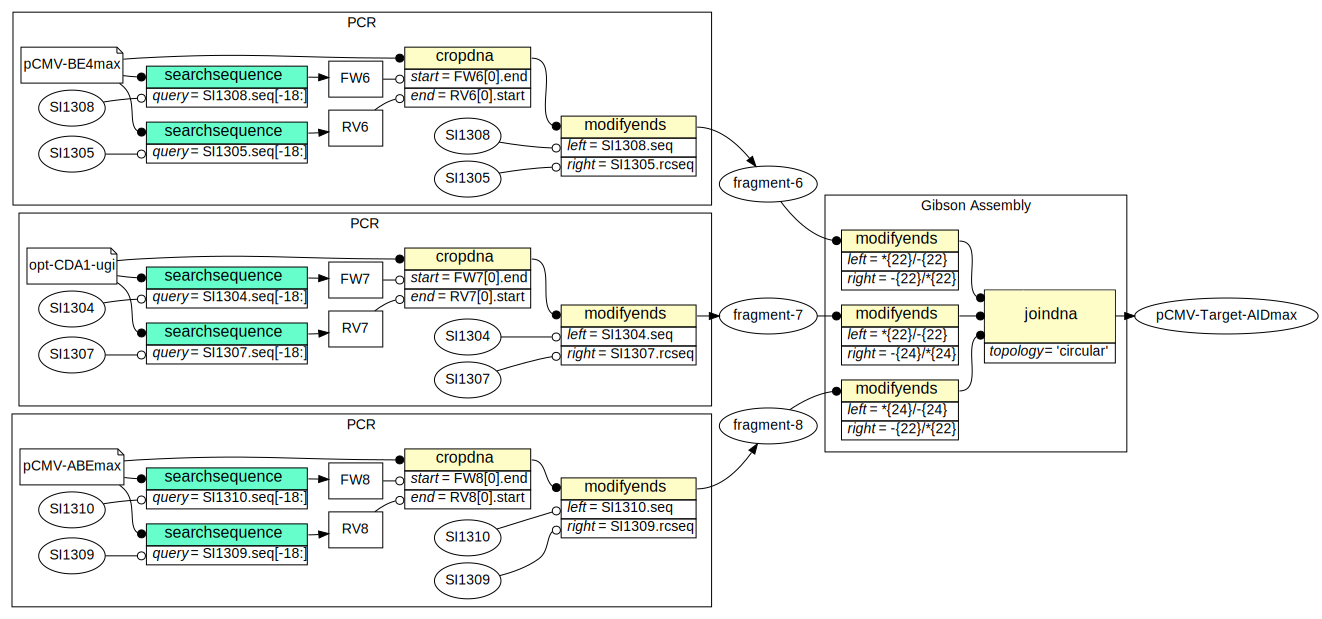

In [10]:
#Visualize the operational process chart of pCMV-Target-AID.
flow = visualizeflow(pCMV_Target_AIDmax, alias_dict = {"fragment7":"fragment-7", "fragment8":"fragment-8", "fragment6":"fragment-6", "pCMV_ABEmax":"pCMV-ABEmax", "pCMV_BE4max":"pCMV-BE4max", "opt_CDA1_ugi":"opt-CDA1-ugi", "pCMV_Target_AIDmax":"pCMV-Target-AIDmax"})
flow.render("output/pCMV_Target_AIDmax_construction")
flow

In [11]:
pCMV_Target_AIDmax.outputgbk("output/pCMV-Target-AIDmax.gbk")

In [12]:
#Generate and execute the quine code and confirm if the cloned QUEEN_object is identical to the original one.
quine(pCMV_Target_AIDmax, execution=True, output="output/pCMV_Target_AIDmax_construction")

True

In [13]:
#Extract the narrative descriptions linked to the operational processes.
quine(pCMV_Target_AIDmax, process_description=True)

1. A nCas9-encoding fragment was amplified from pCMV-BE4max using the primer pair SI1308/SI1305.
2. A fragment encoding the human codon-optimized PmCDA1-UGI was amplified from the pUC-optimized-PmCDA1-ugi plasmid using the primer pair SI1304/SI1307.
3. A backbone fragment was amplified from pCMV-ABEmax using the primer pair SI1310/SI1309.
4. The three fragments were assembled by Gibson Assembly.
